In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
churn_data = pd.read_csv('churn.csv')


Посмотрим датасет

In [4]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


Пропущенных значений нет, данные не нуждаются в очистке.

## ЗАДАНИЯ

### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

<AxesSubplot:xlabel='Exited', ylabel='count'>

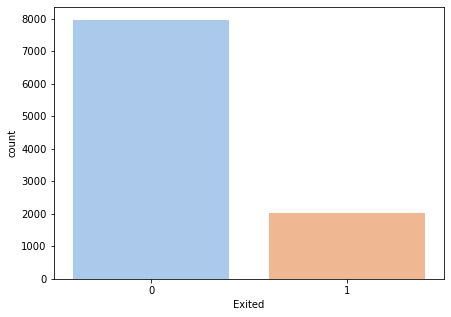

In [6]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Exited',data=churn_data, palette='pastel')

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

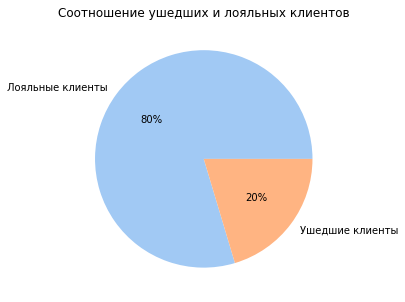

In [7]:
data = churn_data['Exited'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7, 5))
labels = ['Лояльные клиенты', 'Ушедшие клиенты']
colors = sns.color_palette('pastel')[ 0:5 ]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Соотношение ушедших и лояльных клиентов')

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [8]:
data = churn_data[churn_data['Balance'] > 2500]

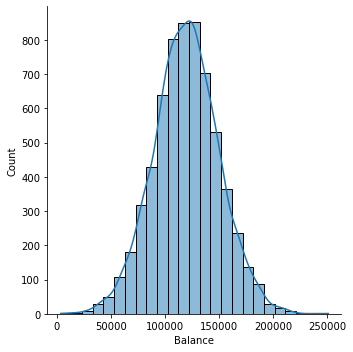

In [9]:
sns.displot(data['Balance'],palette='pastel', kde=True, bins = 25)

По виду распределение баланса пользователей, у которых на счету больше 2 500 долларов похоже на нормальное. 

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

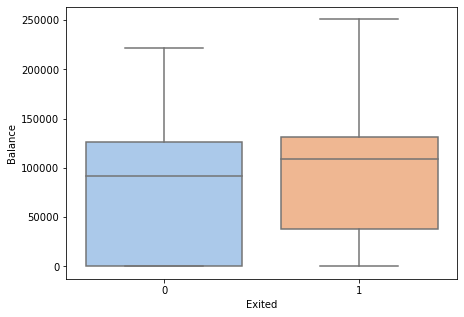

In [10]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Exited", y="Balance",
            palette='pastel', 
            data=churn_data)

Разброс баланса на счетах ушедших клиентов выше, также выше медиана

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

<AxesSubplot:xlabel='Exited', ylabel='Age'>

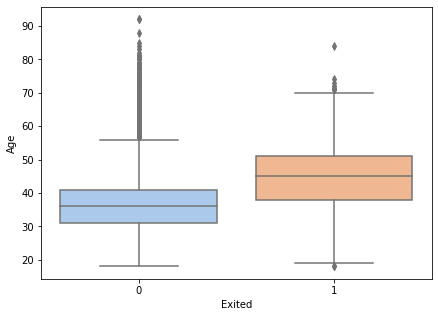

In [11]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Exited", y="Age",
            palette='pastel', 
            data=churn_data)

Разбос возраста выше среди оставшихся клиентов. В то же время, средний возраст ушедших выше, чем у оставшихся. Банку следует обратить внимание на группу 40-50 лет. 

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

<Figure size 504x360 with 0 Axes>

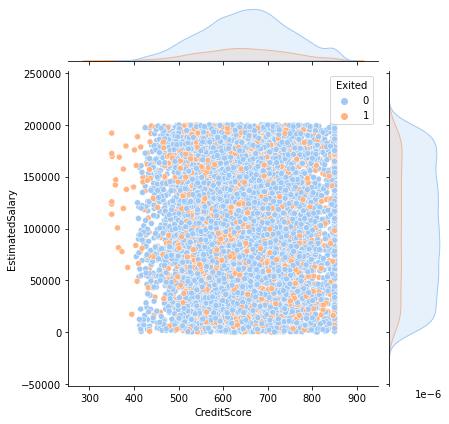

In [12]:
plt.figure(figsize=(7, 5))
sns.jointplot(x='CreditScore',y='EstimatedSalary',hue='Exited', data=churn_data,kind='scatter',palette='pastel')

Явной взаимосвязи между признаками выявить не удалось. 

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

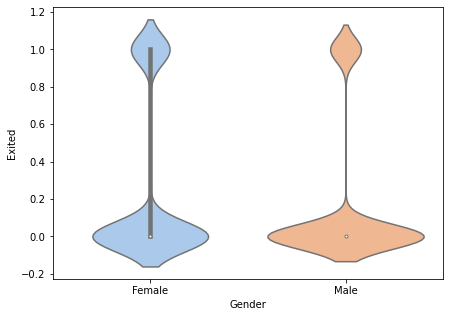

In [13]:
plt.figure(figsize=(7, 5))
sns.violinplot(y="Exited", x="Gender", data=churn_data,palette='pastel')


<Figure size 504x360 with 0 Axes>

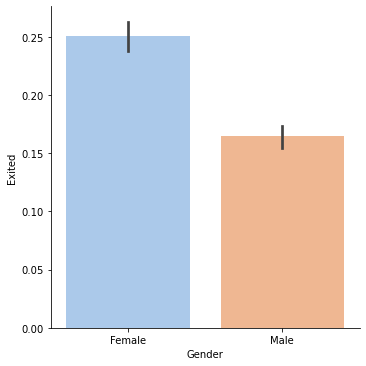

In [14]:
plt.figure(figsize=(7, 5))
sns.catplot(x='Gender',y='Exited',data=churn_data,kind='bar', palette='pastel')

Женщины, судя по всему, уходят чаще. 

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

<AxesSubplot:xlabel='NumOfProducts', ylabel='Count'>

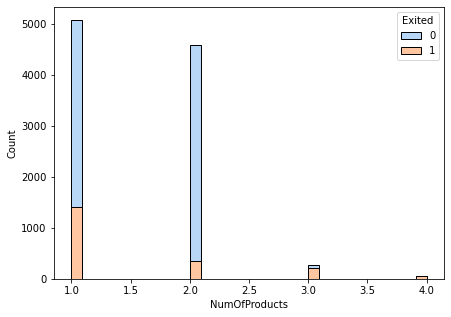

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(
    churn_data,
    x="NumOfProducts", hue="Exited",
    multiple="stack",
    palette="pastel"
       
)

Чем меньше услуг приобрел клиент, тем отток выше. Впрочем, среди тех, кто приобрел у банка 4 услуги вообще нет оставшихся. 

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [16]:
data = churn_data[['IsActiveMember', 'Exited']]

<AxesSubplot:>

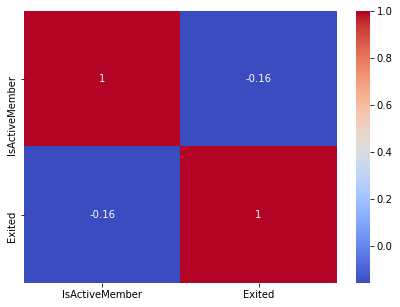

In [17]:
plt.figure(figsize=(7, 5))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Count'>

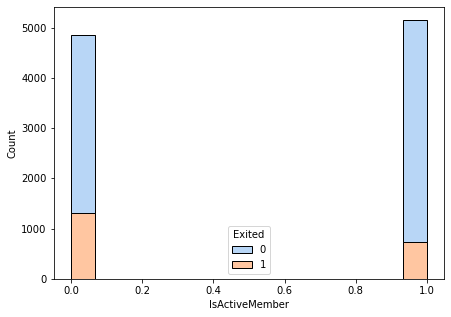

In [18]:
plt.figure(figsize=(7, 5))
sns.histplot(
    data=churn_data,
    x="IsActiveMember", hue="Exited",
    multiple="stack",
    palette="pastel"
)

Активные клиенты уходят реже

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [21]:
grouped = (
churn_data
    .groupby(by='Geography', as_index=False)['Exited']
    .sum()
)
pivot = grouped.pivot_table(
    values='Exited',
    columns='Geography'
)


<AxesSubplot:xlabel='Geography'>

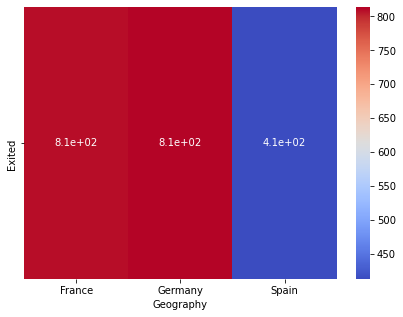

In [22]:
plt.figure(figsize=(7, 5))
sns.heatmap(pivot,cmap='coolwarm',annot=True)

Больше всего ушедших клиентов во Франции и Германии.

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [23]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

<AxesSubplot:xlabel='Tenure', ylabel='CreditScoreCat'>

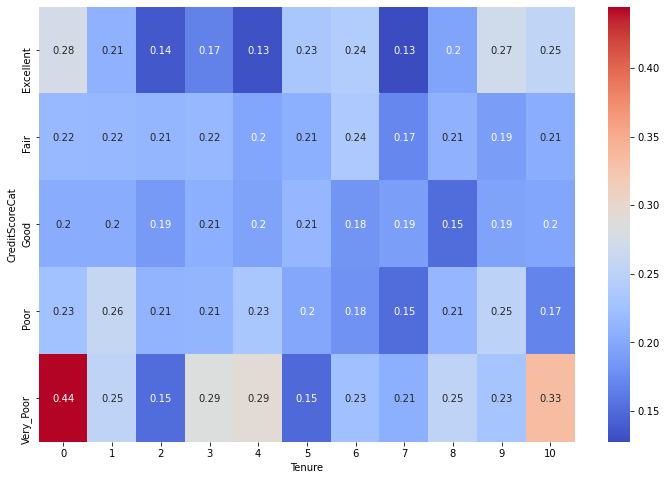

In [24]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot,cmap='coolwarm',annot=True)